<a href="https://colab.research.google.com/github/AayushiPuri/Stock_Price_Prediction/blob/main/StockPricePredUsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction using Decission Trees anf Linear Regression


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/HCLTECH.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)
dataset.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [ ]:
data = dataset[['Open', 'High', 'Low', 'Close', 'Volume']]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5300 entries, 2000-01-11 to 2021-04-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5300 non-null   float64
 1   High    5300 non-null   float64
 2   Low     5300 non-null   float64
 3   Close   5300 non-null   float64
 4   Volume  5300 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 248.4 KB


,Open,High,Low,Close,Volume
Date,,,,,
2000-01-11,1550.0,1725.00,1492.00,1554.45,1192200
2000-01-12,1560.0,1678.85,1560.00,1678.85,344850
2000-01-13,1790.0,1813.20,1781.00,1813.20,53000
2000-01-14,1958.3,1958.30,1835.00,1958.30,270950
2000-01-17,2115.0,2115.00,1801.65,1801.65,428800


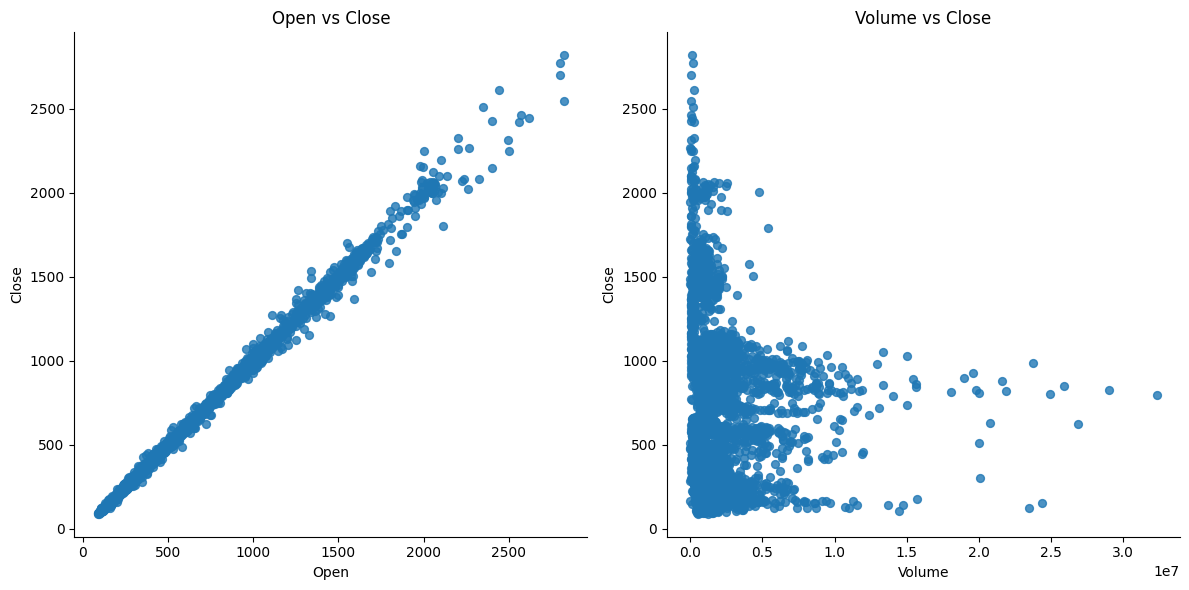

In [ ]:
# @title Open vs Close
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First subplot
data.plot(kind='scatter', x='Open', y='Close', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_title('Open vs Close')

# Second subplot
data.plot(kind='scatter', x='Volume', y='Close', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_title('Volume vs Close')

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

print("Missing values before imputation:")
print(data.isnull().sum())
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data)

numerical_features = data.select_dtypes(include=[np.number]).columns
mean_imputer = SimpleImputer(strategy='mean')
data[numerical_features] = mean_imputer.fit_transform(data[numerical_features])

print("Missing values after imputation:")
print(data.isnull().sum())

print(data.head())

Missing values before imputation:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Missing values after imputation:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
              Open     High      Low    Close     Volume
Date                                                    
2000-01-11  1550.0  1725.00  1492.00  1554.45  1192200.0
2000-01-12  1560.0  1678.85  1560.00  1678.85   344850.0
2000-01-13  1790.0  1813.20  1781.00  1813.20    53000.0
2000-01-14  1958.3  1958.30  1835.00  1958.30   270950.0
2000-01-17  2115.0  2115.00  1801.65  1801.65   428800.0


<ipython-input-33-68d0b105cd91>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_features] = mean_imputer.fit_transform(data[numerical_features])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

<ipython-input-34-4973e82d1b8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [ ]:
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)
train_size = int(len(data_shuffled) * 0.8)
train, test = data_shuffled[:train_size], data_shuffled[train_size:]

In [ ]:
X_train, y_train = train.drop('Close', axis=1), train['Close']
X_test, y_test = test.drop('Close', axis=1), test['Close']

# Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

tree = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)  # cv=5 for 5-fold cross-validation
#random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5, n_iter=100)  # n_iter=100 for 100 random searches
grid_search.fit(X_train, y_train)  # Replace with random_search if using RandomizedSearchCV
best_params = grid_search.best_params_  # Get best hyperparameters
best_model = grid_search.best_estimator_  # Get the best decision tree model

# Train the model
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Make predictions
y_pred = tree.predict(X_test)

In [ ]:
y_pred

array([ 0.21748846, -0.15978686,  0.54204726, ...,  0.41159211,
        0.89964498, -1.19383218])

In [ ]:
test['Predicted1'] = y_pred
test.head()

<ipython-input-40-65e739a96a69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted1'] = y_pred


,Open,High,Low,Close,Volume,Predicted1
4240,0.222623,0.195933,0.232709,0.205342,-0.286878,0.217488
4241,-0.179270,-0.175796,-0.165636,-0.158694,-0.439459,-0.159787
4242,0.500959,0.529704,0.533230,0.563061,0.054419,0.542047
4243,-0.445142,-0.445669,-0.442659,-0.436002,-0.375427,-0.446812
4244,0.418669,0.384892,0.397068,0.368229,-0.087989,0.398109


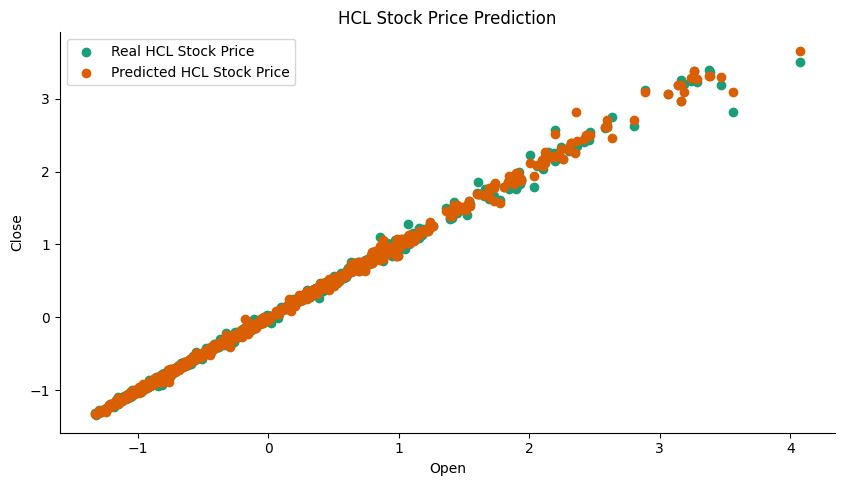

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 5.2))

# Plot the first series (e.g., Real Stock Price) using Seaborn's Dark2 color palette
palette = sns.color_palette('Dark2')
plt.scatter(test['Open'],test['Close'], label='Real HCL Stock Price', color=palette[0])

# Plot the second series (Predicted Stock Price)
plt.scatter(test['Open'], test['Predicted1'], label='Predicted HCL Stock Price', color=palette[1])

# Customize the plot
sns.despine()
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('HCL Stock Price Prediction')
plt.legend()
plt.show()


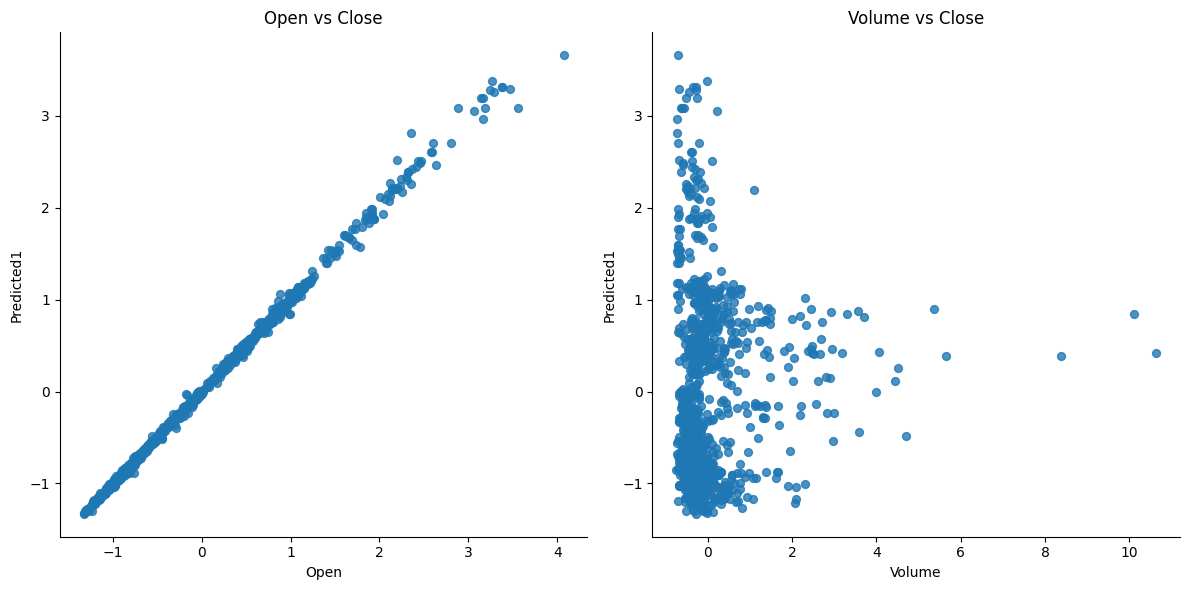

In [ ]:
# @title Open vs Close
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First subplot
test.plot(kind='scatter', x='Open', y='Predicted1', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_title('Open vs Close')

# Second subplot
test.plot(kind='scatter', x='Volume', y='Predicted1', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_title('Volume vs Close')

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0012093115210155844
Mean Absolute Error: 0.018122704853847347
R-squared: 0.9986905884261121


#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
LR = LinearRegression()
LR.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred2 = LR.predict(X_test)
test['Predicted2'] = y_pred
test.head()

<ipython-input-45-96510fe204b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted2'] = y_pred


,Open,High,Low,Close,Volume,Predicted1,Predicted2
4240,0.222623,0.195933,0.232709,0.205342,-0.286878,0.217488,0.217488
4241,-0.179270,-0.175796,-0.165636,-0.158694,-0.439459,-0.159787,-0.159787
4242,0.500959,0.529704,0.533230,0.563061,0.054419,0.542047,0.542047
4243,-0.445142,-0.445669,-0.442659,-0.436002,-0.375427,-0.446812,-0.446812
4244,0.418669,0.384892,0.397068,0.368229,-0.087989,0.398109,0.398109


In [ ]:
# Calculate evaluation metrics
mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print(f'Mean Squared Error: {mse2}')
print(f'Mean Absolute Error: {mae2}')
print(f'R-squared: {r2_2}')

Mean Squared Error: 0.0004656680563647139
Mean Absolute Error: 0.011124166551744035
R-squared: 0.9994957865430061


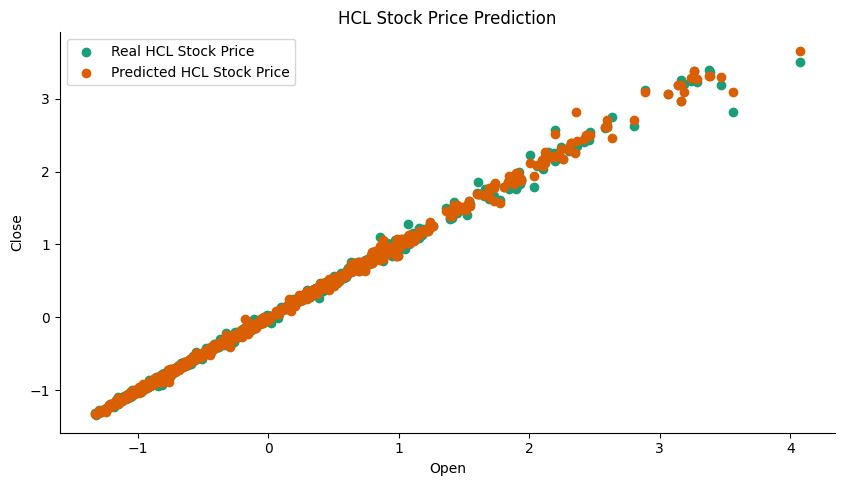

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 5.2))

# Plot the first series (e.g., Real Stock Price) using Seaborn's Dark2 color palette
palette = sns.color_palette('Dark2')
plt.scatter(test['Open'],test['Close'], label='Real HCL Stock Price', color=palette[0])

# Plot the second series (Predicted Stock Price)
plt.scatter(test['Open'], test['Predicted2'], label='Predicted HCL Stock Price', color=palette[1])

# Customize the plot
sns.despine()
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('HCL Stock Price Prediction')
plt.legend()
plt.show()
